In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

# !pip install autoviz
# !pip install --pre pycaret

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВАЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train_house.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df = pd.read_csv(path_train)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          682 non-null    int64  
 1   m2             682 non-null    float64
 2   beds           682 non-null    float64
 3   bath           682 non-null    float64
 4   laundry        682 non-null    object 
 5   pets           682 non-null    object 
 6   housing_type   682 non-null    object 
 7   parking        682 non-null    object 
 8   hood_district  682 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 48.1+ KB


In [7]:
df.describe()

,price,m2,beds,bath,hood_district
count,682.000000,682.000000,682.000000,682.000000,682.000000
mean,3337.233138,7.857385,1.593842,1.335777,7.010264
std,1038.886149,3.272585,0.993735,0.501989,2.471253
min,750.000000,1.294625,0.000000,1.000000,1.000000
25%,2596.250000,5.610040,1.000000,1.000000,6.000000
50%,3200.000000,7.400938,1.000000,1.000000,8.000000
75%,3995.000000,9.500387,2.000000,2.000000,9.000000
max,5995.000000,25.029410,6.000000,3.500000,10.000000


In [8]:
df[df.duplicated()]

,price,m2,beds,bath,laundry,pets,housing_type,parking,hood_district


In [9]:
# отбор всех сторок с нулевым. значением в любом месте колонки
df[df.eq(0).any(axis=1)]

,price,m2,beds,bath,laundry,pets,housing_type,parking,hood_district
1,1775,2.761866,0.0,1.0,(b) on-site,(d) no pets,(c) multi,(d) no parking,2.0
15,1800,4.315416,0.0,1.0,(c) no laundry,(d) no pets,(c) multi,(d) no parking,8.0
34,1895,3.711257,0.0,1.0,(b) on-site,(d) no pets,(c) multi,(d) no parking,8.0
43,2418,3.719888,0.0,1.0,(a) in-unit,(d) no pets,(c) multi,(c) off-street,9.0
47,1400,2.589249,0.0,1.0,(a) in-unit,(d) no pets,(c) multi,(c) off-street,10.0
...,...,...,...,...,...,...,...,...,...
658,2050,3.020791,0.0,1.0,(c) no laundry,(d) no pets,(c) multi,(b) protected,9.0
659,2000,4.315416,0.0,1.0,(b) on-site,(d) no pets,(c) multi,(c) off-street,4.0
660,1875,3.883874,0.0,1.0,(b) on-site,(d) no pets,(c) multi,(d) no parking,8.0
669,1800,3.797566,0.0,1.0,(c) no laundry,(d) no pets,(c) multi,(d) no parking,8.0


In [10]:
df.isna().sum()

price            0
m2               0
beds             0
bath             0
laundry          0
pets             0
housing_type     0
parking          0
hood_district    0
dtype: int64

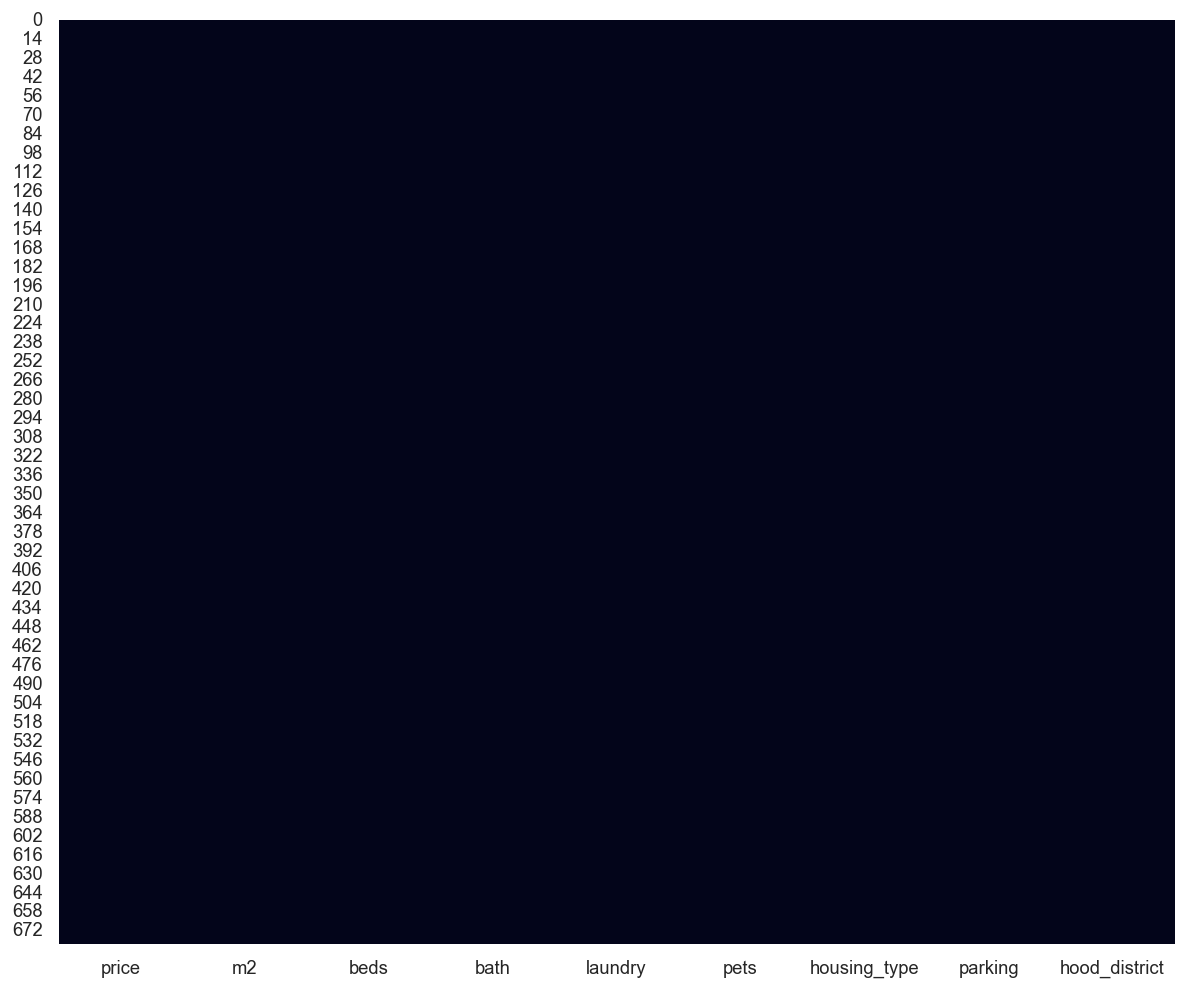

In [11]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 10)})
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки price: [3450 1775 2195 2950 3150 4000 2999 5200 3699 3898 2900 3200 1890 3300
 3600 1800 3000 3549 2800 2795 3595 4500 2750 4195 3500 2595 5000 3184
 2650 1850 1895 3370 3395 3400 3250 3975 2790 3995 2418 2339 2600 2495
 1400 3100 4305 1290 3951 4800 3850 2998 4200 4700 2075 3800 2445 2995
 2956 4242 5650 2986 2404 5915 2395 1600 2698 1995 2975 3950 1950 3095
 4400 4750 2300 4876 2000 2450 5595 3700 2500 5500 2200 2137 2100 5950
 2702 4595 1250 4995 3807 5700 3900 2700 4050 1695 3698 4495 4150 2890
 3990 4991 5400 1691 3107 2246 2610 3044 2483 2680 3050 5995 2660 2786
 3190 1820 5900 1699 5250 2550 2349 3416 2733 2099 3725 1900 4375 3198
 4099 2335 3271 5600 4600 4149 2815 4075 4202 3734 5450 1780 2882 2345
 2574 3459 3575 4265 3588 5555 2996 2695 2490 4295 3895 3498 2906 1675
 3896 4068 2990 4250 2400 2420 2880 3581 1660 2199 3999 3869 3663 2915
 1929 3099 3572 3295 1799 5195 1980 4950 3884 2685 1674 4350 3195 3728
 3490 2875 2617 2917 3495 1700 3290 4488 1

In [13]:
df.laundry.unique()

array(['(b) on-site', '(a) in-unit', '(c) no laundry'], dtype=object)

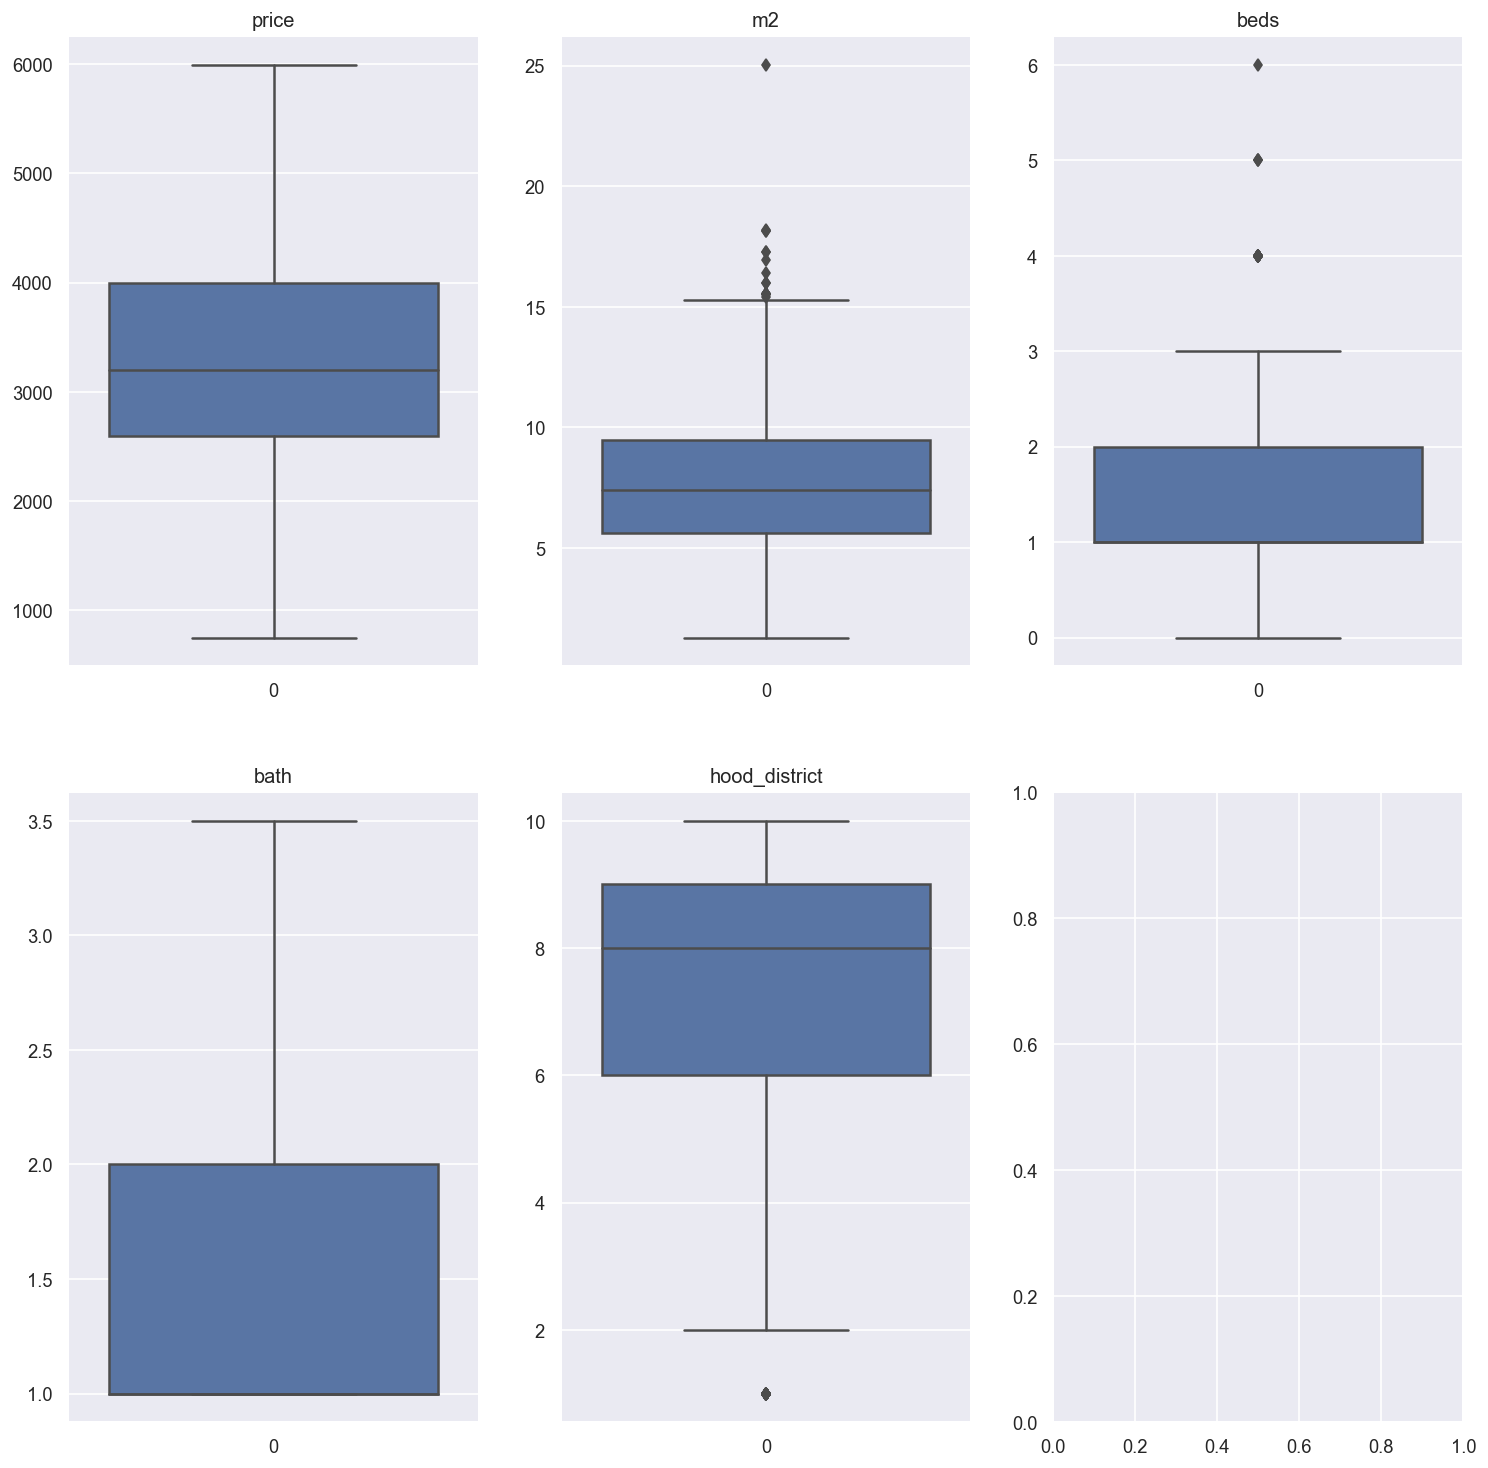

In [14]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

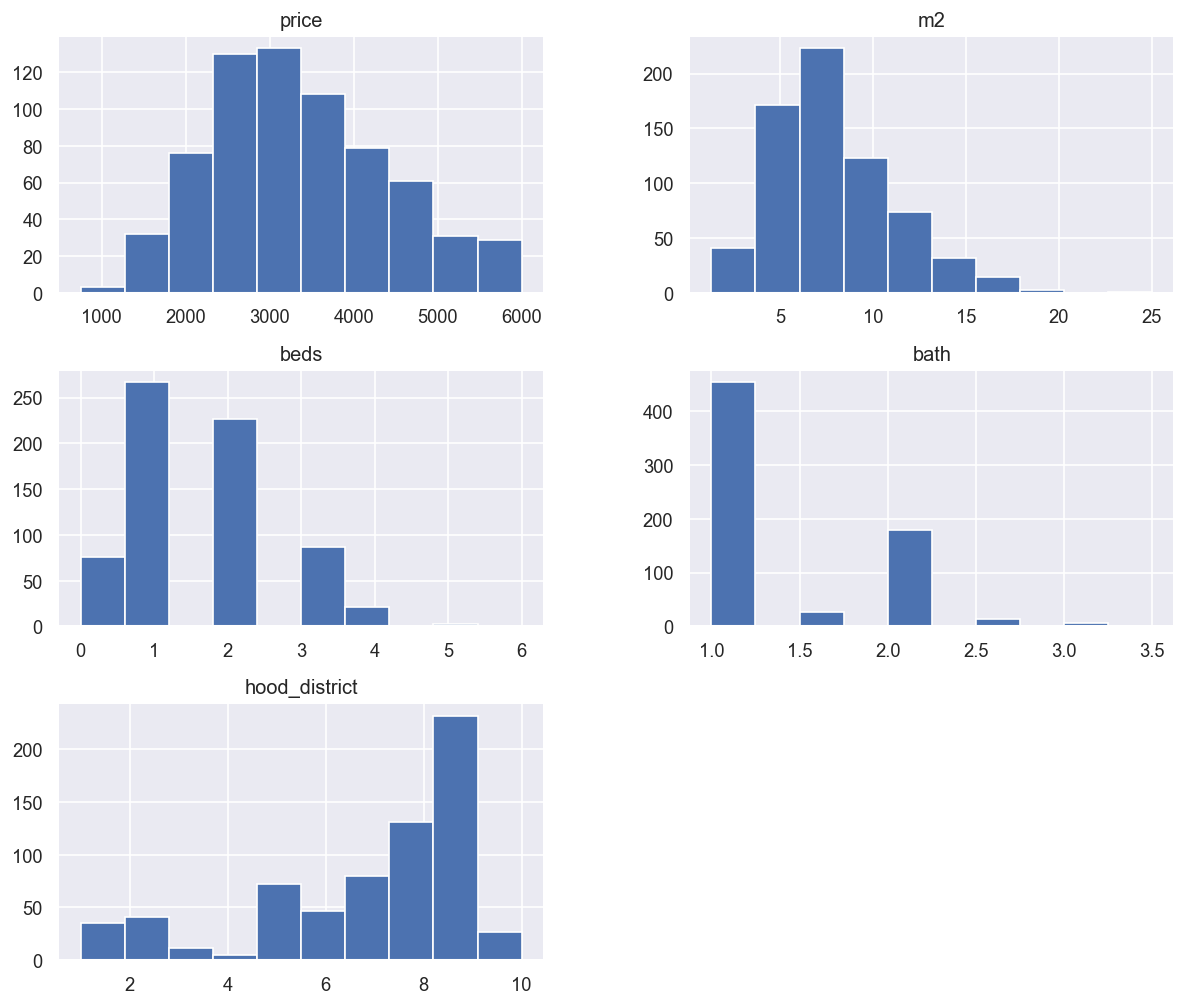

In [15]:
df.hist();

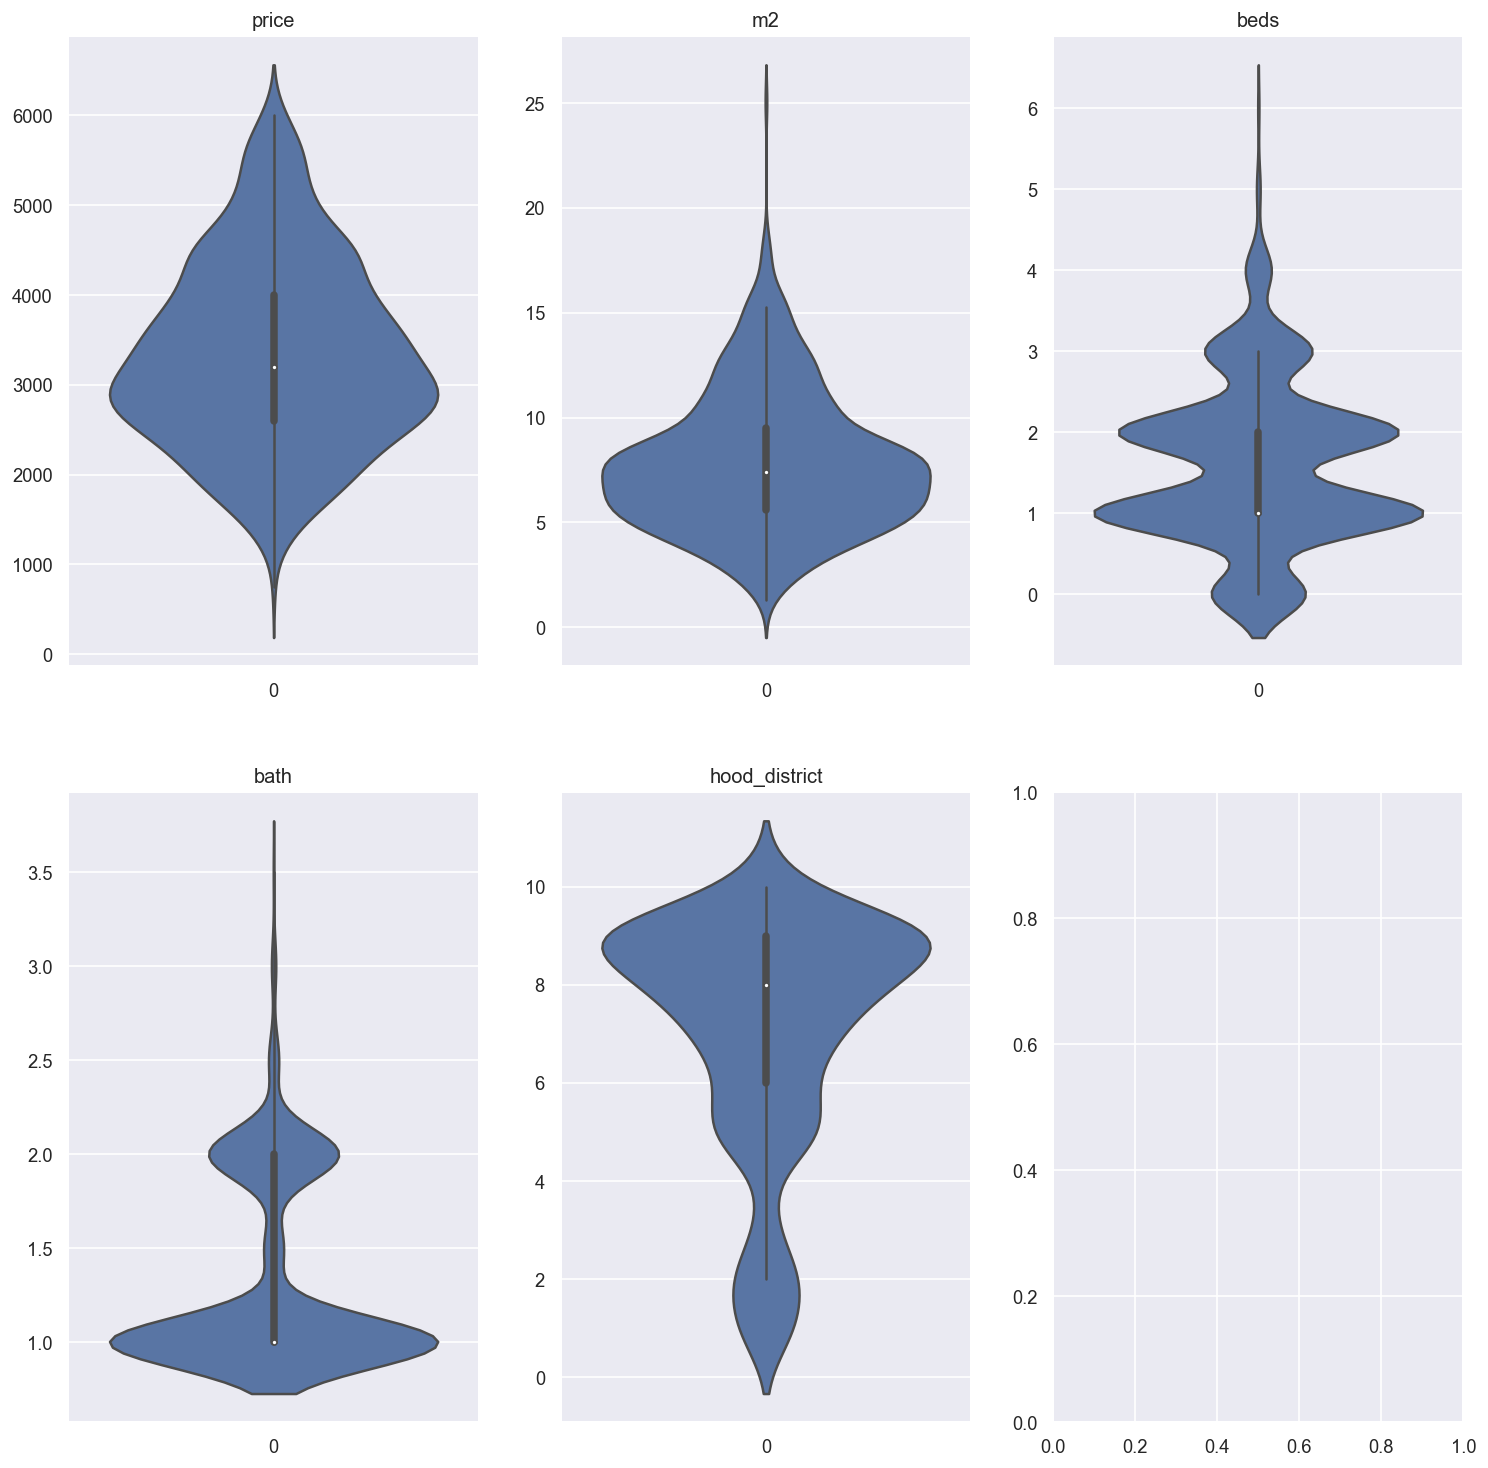

In [16]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

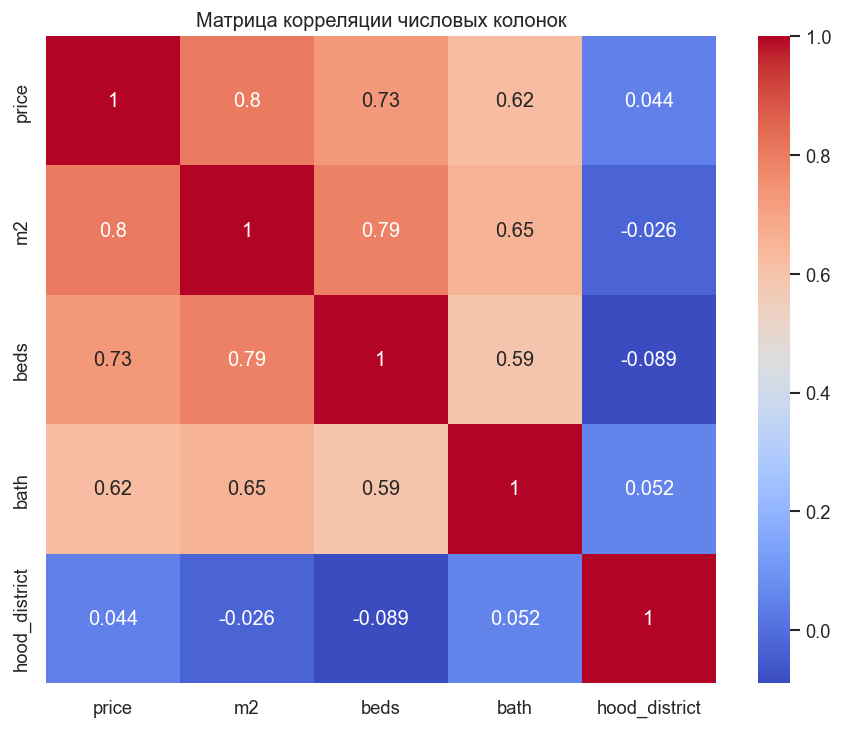

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# отображаем график
plt.show()

Начинаем самое интересное

In [18]:
X = df.drop(['price'],axis=1)
y = df['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
X_train.housing_type.unique()

array(['(c) multi', '(a) single', '(b) double'], dtype=object)

In [21]:
X_train['pets']

334       (a) both
208       (a) both
36     (d) no pets
155       (a) both
88        (a) both
          ...     
344       (a) both
318    (d) no pets
557    (d) no pets
227       (a) both
516    (d) no pets
Name: pets, Length: 511, dtype: object

In [22]:
axis_features = ['m2', 'beds','bath','hood_district']
categorical_features = ['parking']


imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder())
    
])


imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

order_for_cat = [{
    'col':'pets',
    'mapping':{'(d) no pets':0, '(c) cats':1, '(b) dogs':2, '(a) both':3}
    }]

imputer_for_categorical_with_order = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
    ('scaler', MinMaxScaler())
    ])


order_for_cat2 = [{
    'col':'housing_type',
    'mapping':{'(c) multi':0, '(b) double':1, '(a) single':2}
    }]

imputer_for_categorical_with_order2 = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat2)),
    ('scaler', MinMaxScaler())
    ])


order_for_cat3 = [{
    'col':'laundry',  
    'mapping': {'(b) on-site':0, '(a) in-unit':1, '(c) no laundry':2}
    
}]

imputer_for_categorical_with_order3 = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat3)),
    ('scaler', MinMaxScaler())
    ])

order_for_cat4 = [{
    'col':'parking',
    'mapping':{'(d) no parking':0, '(c) off-street':1, '(b) protected':2, '(a) valet':3}
    }]

imputer_for_categorical_with_order4 = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat4))
    ])


CT = ColumnTransformer([
    
        ("imputer_for_nums", imputer_for_nums, axis_features), # 
#         ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## страны и тд
        ("imputer_for_categorical_with_order", imputer_for_categorical_with_order, ["pets"]), # приоритизация
         ("imputer_for_categorical_with_order2", imputer_for_categorical_with_order2, ["housing_type"]),
        ("imputer_for_categorical_with_order3", imputer_for_categorical_with_order3, ["laundry"]),
         ("imputer_for_categorical_with_order4", imputer_for_categorical_with_order4, ["parking"]),
             ], 
    
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_for_nums',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['m2', 'beds', 'bath', 'hood_district']),
                                ('imputer_for_categorical_with_order',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'pets',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': (d) no pets    0
(c) cats       1
(b) dogs       2
(a) both       3
dt...
                                                  OrdinalEncoder(mapping=[{'col': 'laundry',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': (b) on-site       0
(a) in-unit       1
(c) no laundry    2
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['laundry']),
                                ('imputer_for_categorical_with_order4',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'parking',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': (d) no parking    0
(c) off-street    1
(b) protected     2
(a) valet         3
dtype: int64}]))]),
                                 ['parking'])])

In [23]:
X_train_new = pd.DataFrame(res_ct)


display(X_train_new.T)

X_test_new = pd.DataFrame(CT.fit_transform(X_test))


display(X_test_new.T)

y_train_new = y_train.values

,0,1,2,3,4,5,6,7,8,9,...,501,502,503,504,505,506,507,508,509,510
0,0.178022,0.267766,0.267399,0.154212,0.408425,0.120879,0.230769,0.304029,0.155678,0.241758,...,0.212454,0.450549,0.175824,0.094872,0.276557,0.212454,0.094872,0.413919,0.186813,0.434432
1,0.166667,0.166667,0.166667,0.166667,0.333333,0.166667,0.166667,0.333333,0.166667,0.166667,...,0.333333,0.500000,0.166667,0.000000,0.166667,0.166667,0.000000,0.166667,0.166667,0.333333
2,0.000000,0.400000,0.000000,0.200000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.400000
3,0.888889,0.888889,0.777778,0.888889,0.888889,1.000000,0.888889,0.444444,0.777778,0.888889,...,0.555556,0.888889,0.444444,0.777778,0.888889,0.888889,0.777778,0.888889,0.555556,0.888889
4,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000
7,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000


,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.272727,0.121212,0.528485,0.187879,0.666667,0.454545,0.212121,0.501212,0.412121,0.303030,...,0.636364,0.30303,0.939394,0.348485,0.333333,0.318182,0.393939,0.272727,0.30303,0.272727
1,0.250000,0.000000,0.500000,0.000000,0.750000,0.500000,0.250000,0.500000,1.000000,0.250000,...,0.250000,0.25000,0.500000,0.250000,0.250000,0.500000,0.250000,0.250000,0.50000,0.250000
2,0.000000,0.000000,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.00000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.444444,0.888889,0.444444,0.888889,0.888889,0.888889,0.888889,0.777778,0.777778,0.666667,...,0.777778,0.00000,0.666667,0.666667,0.000000,0.777778,0.000000,1.000000,0.00000,0.777778
4,0.333333,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.333333
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000,0.000000
6,1.000000,1.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,...,0.500000,0.00000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
7,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,...,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000


In [24]:
X_train_new

,0,1,2,3,4,5,6,7
0,0.178022,0.166667,0.0,0.888889,1.0,0.0,0.0,0.0
1,0.267766,0.166667,0.4,0.888889,1.0,0.0,0.5,2.0
2,0.267399,0.166667,0.0,0.777778,0.0,0.0,0.5,2.0
3,0.154212,0.166667,0.2,0.888889,1.0,0.0,0.5,2.0
4,0.408425,0.333333,0.4,0.888889,1.0,0.0,0.5,2.0
...,...,...,...,...,...,...,...,...
506,0.212454,0.166667,0.0,0.888889,1.0,0.0,0.0,2.0
507,0.094872,0.000000,0.0,0.777778,0.0,0.0,0.0,0.0
508,0.413919,0.166667,0.4,0.888889,0.0,0.0,0.5,2.0
509,0.186813,0.166667,0.0,0.555556,1.0,0.0,0.0,2.0


In [25]:
from pycaret.regression import *
setup(X_train_new,target=y_train_new,session_id=42,train_size= 0.8)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(511, 9)"
4,Transformed data shape,"(511, 9)"
5,Transformed train set shape,"(408, 9)"
6,Transformed test set shape,"(103, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [26]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,436.3726,323740.7467,563.5491,0.7143,0.1623,0.1329,1.2140
rf,Random Forest Regressor,441.3758,330564.0676,569.3003,0.7075,0.1684,0.1371,0.8980
lightgbm,Light Gradient Boosting Machine,454.0767,340043.1325,578.0092,0.6979,0.1740,0.1417,1.0250
gbr,Gradient Boosting Regressor,442.1379,339139.6770,577.0599,0.6976,0.1631,0.1331,0.8670
ada,AdaBoost Regressor,476.2058,354484.4994,590.2396,0.6847,0.1828,0.1566,0.8320
huber,Huber Regressor,455.2225,358485.6818,590.7517,0.6844,0.1718,0.1392,0.7360
br,Bayesian Ridge,461.6658,360177.4973,592.3138,0.6832,0.1753,0.1440,0.7540
lasso,Lasso Regression,460.8809,360415.3836,592.1985,0.6831,0.1750,0.1435,0.9150
llar,Lasso Least Angle Regression,460.8827,360413.0990,592.1972,0.6831,0.1750,0.1435,0.7630
lar,Least Angle Regression,460.3869,360387.3646,592.2014,0.6830,0.1747,0.1432,0.7780


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [27]:
clf_list = [KNeighborsRegressor(),  RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), DecisionTreeRegressor()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([-0.15521242, -0.17116504, -0.20388149, -0.15192449, -0.16131598]),
 array([-0.14865091, -0.12410746, -0.15188047, -0.12460575, -0.12486017]),
 array([-0.14111718, -0.12367704, -0.14935043, -0.11987132, -0.12310436]),
 array([-0.1575514 , -0.13352975, -0.15875324, -0.1197816 , -0.13255211]),
 array([-0.18091369, -0.16602369, -0.17573592, -0.1856289 , -0.15760627])]

In [28]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor()
0,-0.155212,-0.148651,-0.141117,-0.157551,-0.180914
1,-0.171165,-0.124107,-0.123677,-0.133530,-0.166024
2,-0.203881,-0.151880,-0.149350,-0.158753,-0.175736
3,-0.151924,-0.124606,-0.119871,-0.119782,-0.185629
4,-0.161316,-0.124860,-0.123104,-0.132552,-0.157606


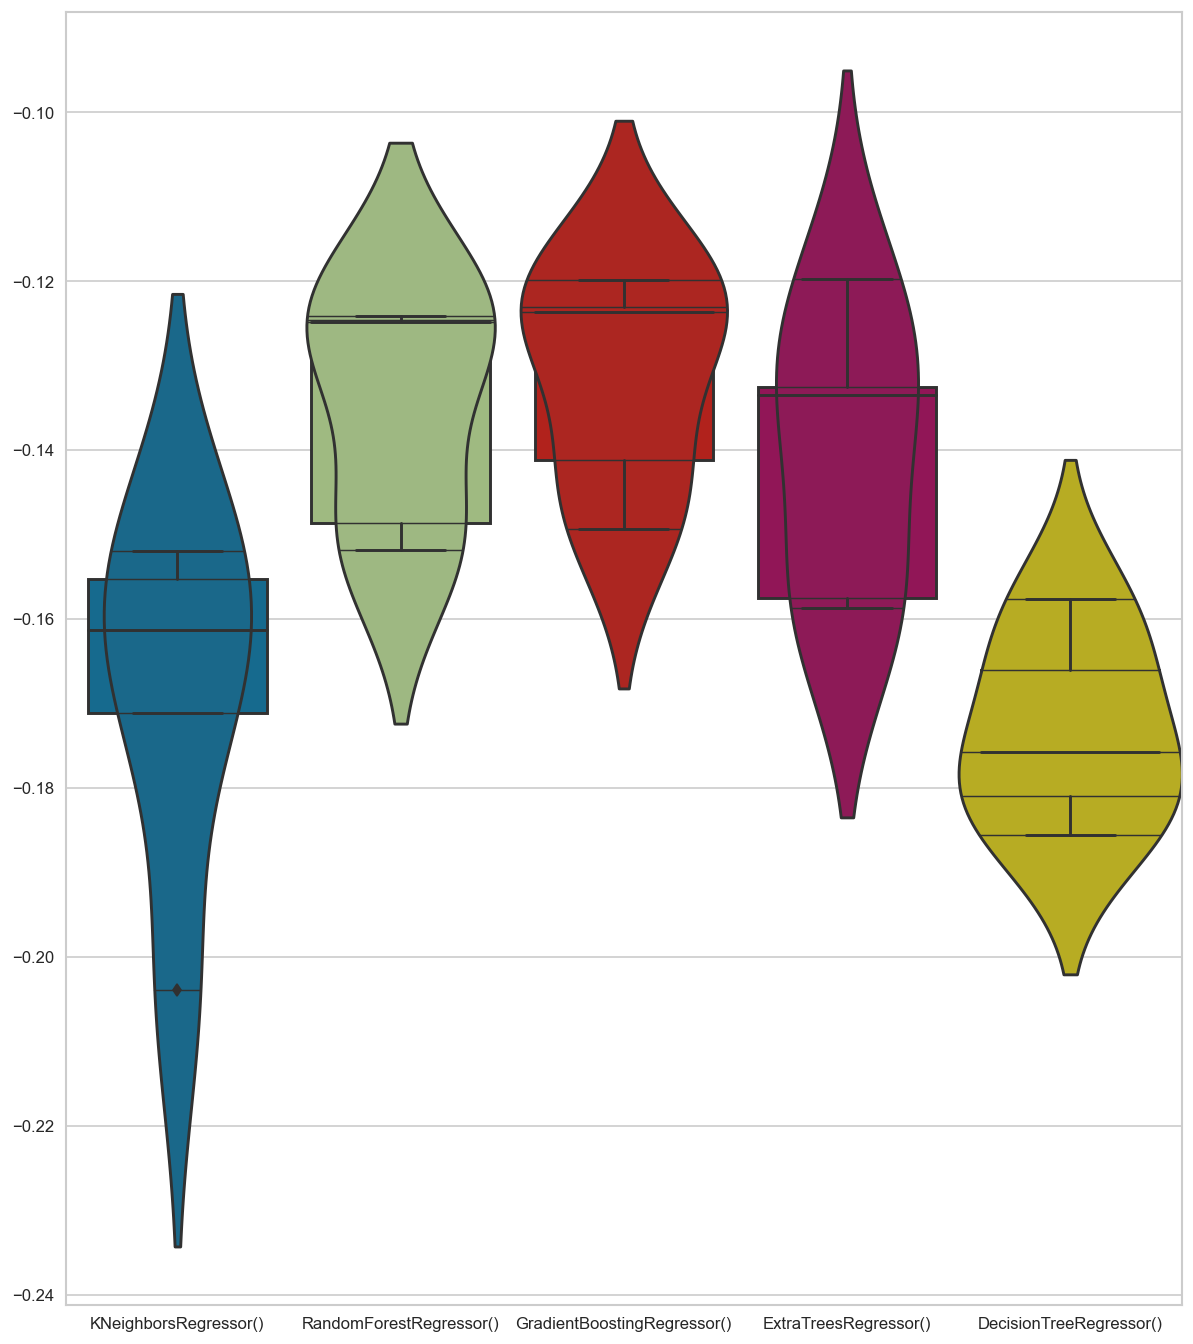

In [29]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [30]:
clf_list = [RandomForestRegressor(), Lasso(), Ridge()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([-0.15022805, -0.12399152, -0.15160283, -0.1245679 , -0.1283343 ]),
 array([-0.13355772, -0.13291079, -0.16371237, -0.13747865, -0.12645777]),
 array([-0.13470016, -0.13598533, -0.16983207, -0.13993691, -0.12965058])]

In [31]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,RandomForestRegressor(),Lasso(),Ridge()
0,-0.150228,-0.133558,-0.134700
1,-0.123992,-0.132911,-0.135985
2,-0.151603,-0.163712,-0.169832
3,-0.124568,-0.137479,-0.139937
4,-0.128334,-0.126458,-0.129651


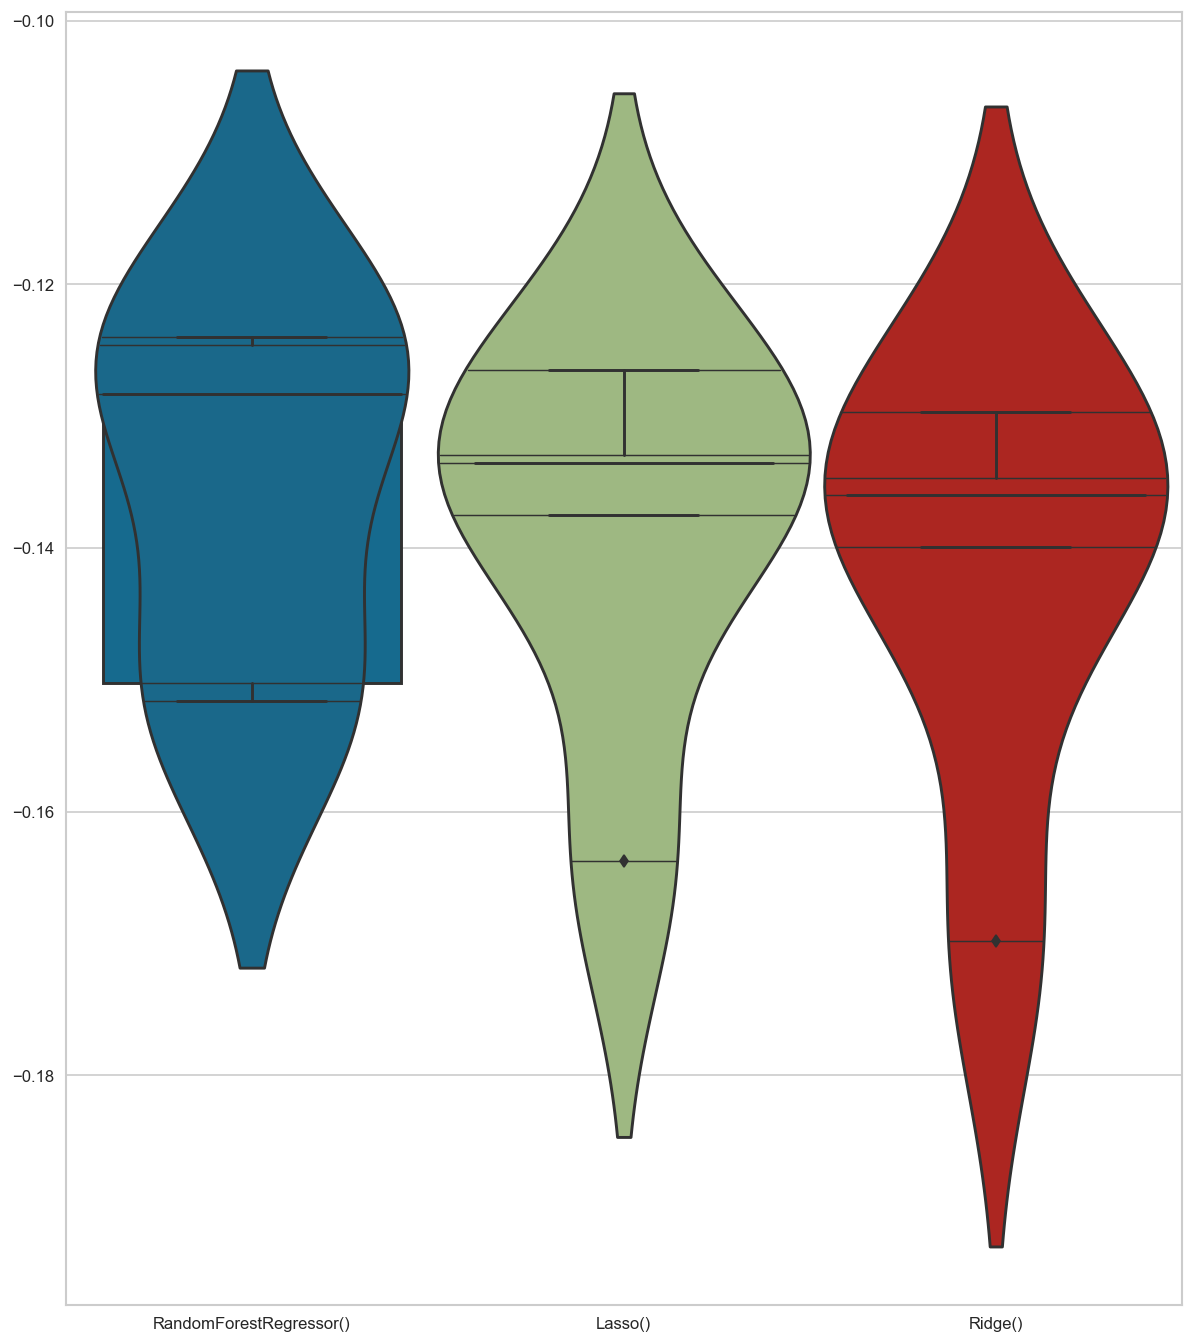

In [32]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

Самым лучшим  считаю RandomForestRegressor() 

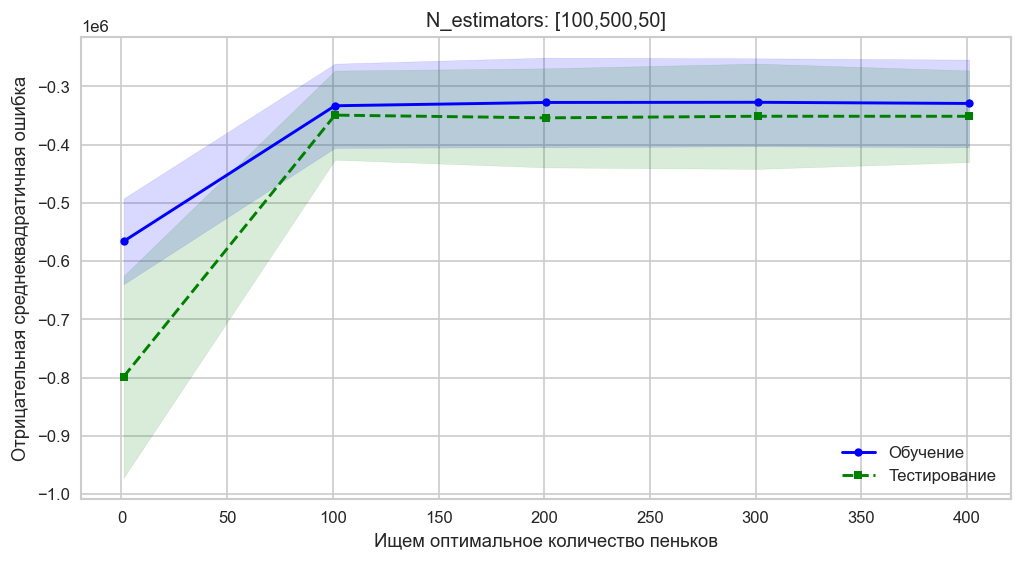

In [33]:
# Подбираем кол-во estimator , чем больше тем лучше, но слишком много тоже не нужно, поищем когда уменьшится улучшение модели

n_estimators = np.arange(1,500,100)
scores_train = []
scores_test = []
for i in n_estimators:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=i))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('N_estimators: [100,500,50]')
plt.plot(n_estimators, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(n_estimators, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(n_estimators, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(n_estimators, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество пеньков')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

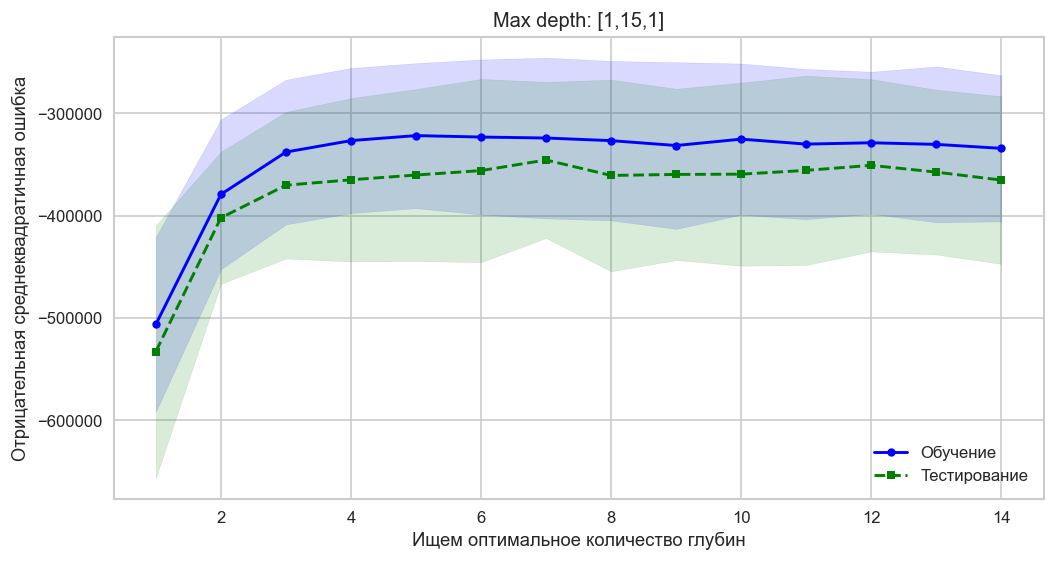

In [34]:
# max_depth

max_depth = np.arange(1,15,1)
scores_train = []
scores_test = []
for i in max_depth:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=100, max_depth = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max depth: [1,15,1]')
plt.plot(max_depth, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_depth, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество глубин')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

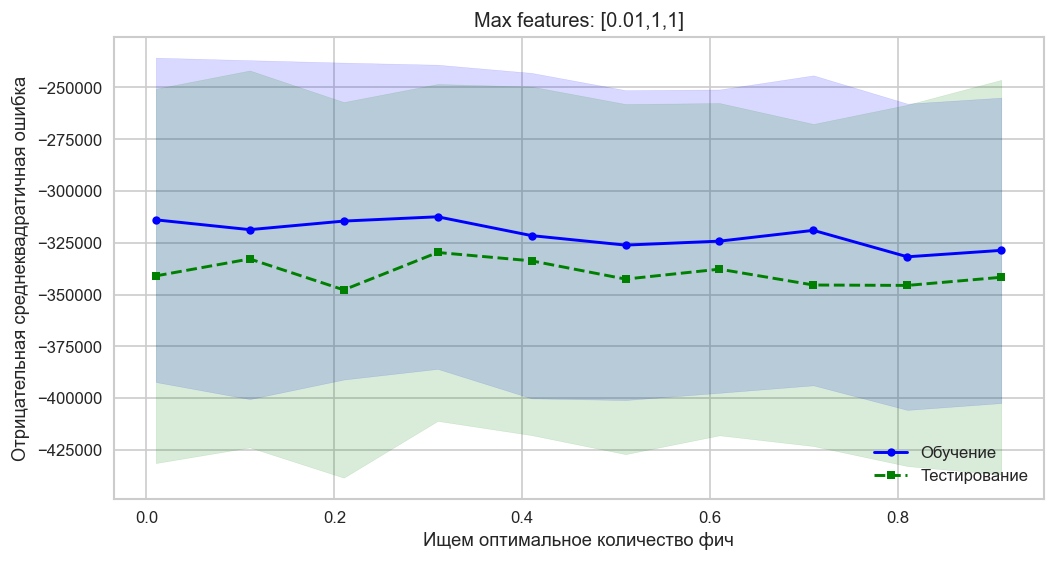

In [35]:
# количество фич

max_features = np.arange(0.01,1,0.1)
scores_train = []
scores_test = []
for i in max_features:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=100, max_features = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max features: [0.01,1,1]')
plt.plot(max_features, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_features, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_features, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_features, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество фич')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

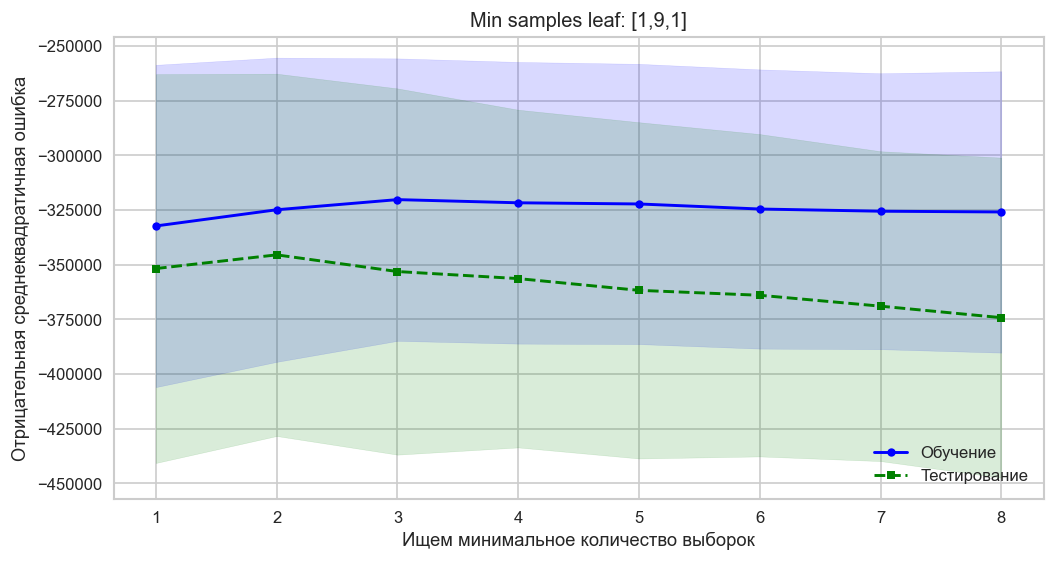

In [36]:
#min _ samples_leaf

min_samples_leaf = np.arange(1,9,1)
scores_train = []
scores_test = []
for i in min_samples_leaf:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=100, min_samples_leaf = i, n_jobs=-1, random_state =42))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Min samples leaf: [1,9,1]')
plt.plot(min_samples_leaf, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(min_samples_leaf, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(min_samples_leaf, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(min_samples_leaf, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем минимальное количество выборок')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

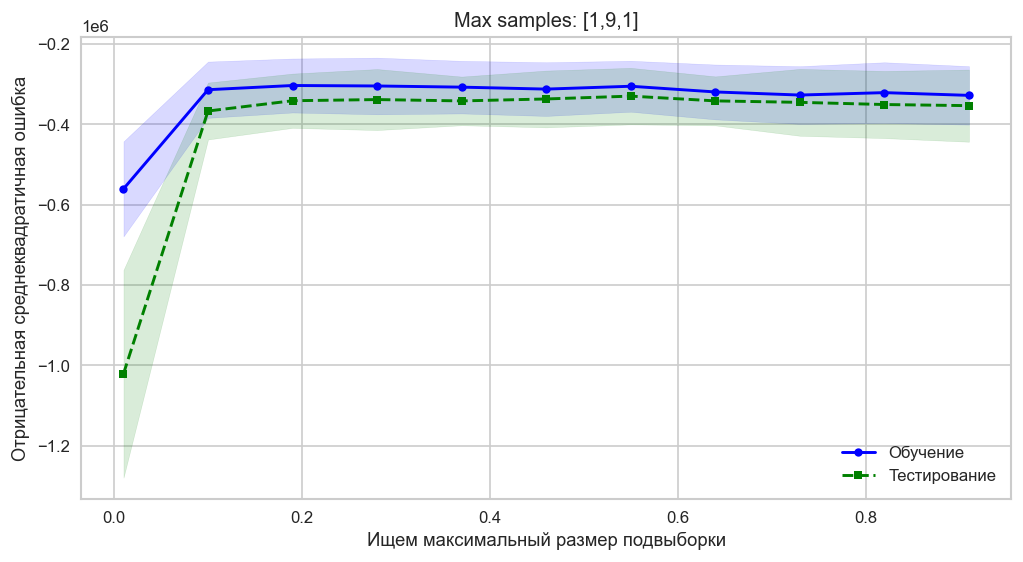

In [37]:
# Подбираем кол-во estimator , чем больше тем лучше, но слишком много тоже не нужно, поищем когда уменьшится улучшение модели

max_samples = np.arange(0.01,1,0.09)
scores_train = []
scores_test = []
for i in max_samples:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestRegressor(n_estimators=100, max_samples = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5), scoring = 'neg_mean_squared_error'))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5), scoring = 'neg_mean_squared_error'))
train_mean = np.mean(scores_train, axis=1)
train_std = np.std(scores_train, axis=1)
test_mean = np.mean(scores_test, axis=1)
test_std = np.std(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max samples: [1,9,1]')
plt.plot(max_samples, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_samples, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_samples, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_samples, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем максимальный размер подвыборки')
plt.ylabel('Отрицательная среднеквадратичная ошибка')
plt.legend(loc='lower right')
plt.show()

In [38]:


# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor(max_features = 12, min_samples_leaf = 5, n_estimators = 150
#                                                     ,criterion = 'friedman_mse', min_samples_split = 3, max_depth = 6,
#                                                     n_jobs = -1))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = pipe_1.predict(X_test)

# print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.11048663383452005
Test: 0.13746977433709895


In [39]:

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor(n_jobs = -1))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = pipe_1.predict(X_test)

# print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.05184461803694796
Test: 0.13577195679389825


In [44]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(n_estimators= 150, max_depth = 6, max_features = 0.4, min_samples_leaf = 1, 
                                                     max_samples = 0.5 ,n_jobs = -1))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.10934263889630033
Test: 0.13558004435613158


На ней остановлюсь

In [41]:
gbrt = Pipeline([('preprocessing', CT),
                ('regressor', GradientBoostingRegressor(min_samples_leaf=7,
                           n_estimators=60))])

gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print('Правильность на тестовом наборе по МAPE GradientBoostingRegressor: {:.3f}'.format(mean_absolute_percentage_error(y_pred, y_test)))

Правильность на тестовом наборе по МAPE GradientBoostingRegressor: 0.125


In [42]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', Lasso())])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test)

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.1364629496898328
Test: 0.13665175952200062


In [43]:
pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', GradientBoostingRegressor(n_estimators= 200, random_state = 42))])
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_test) # ,max_depth = 10

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

Train: 0.0786412154982153
Test: 0.12750950551438137
